In [3]:
import numpy as np
import math
import pandas as pd
import mplfinance as mpf
import time

In [27]:
PATH = r'../data/stooq/data/daily/'
MARKET = r'us/nasdaq stocks'
TICKER = 'aapl'
FILE_CSV = PATH+MARKET+"/1/"+TICKER+".csv"

# Import historical price data
df_stock  = pd.DataFrame(pd.read_csv(FILE_CSV))
df_stock = df_stock.set_index(pd.DatetimeIndex(df_stock['Date']))

df_stock.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,,
1984-09-07,1984-09-07 00:00:00,0.10182,0.10306,0.10060,0.10182,96661645,0
1984-09-10,1984-09-10 00:00:00,0.10182,0.10213,0.09937,0.10122,75025205,0
1984-09-11,1984-09-11 00:00:00,0.10213,0.10490,0.10213,0.10306,176913886,0
1984-09-12,1984-09-12 00:00:00,0.10306,0.10367,0.09998,0.09998,154549368,0
1984-09-13,1984-09-13 00:00:00,0.10552,0.10582,0.10552,0.10552,240704925,0


In [28]:
MARKET = r'us/nyse etfs'
TICKER = 'voo'
FILE_CSV = PATH+MARKET+"/"+TICKER+".csv"

# Import historical price data
df_index  = pd.DataFrame(pd.read_csv(FILE_CSV))
df_index = df_index.set_index(pd.DatetimeIndex(df_index['Date']))

df_index.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,,
2010-09-14,2010-09-14 00:00:00,84.386,84.910,84.007,84.549,72412,0
2010-09-15,2010-09-15 00:00:00,84.203,84.827,84.022,84.763,11315,0
2010-09-16,2010-09-16 00:00:00,84.533,84.781,84.269,84.729,72610,0
2010-09-17,2010-09-17 00:00:00,85.237,85.237,84.533,84.812,60465,0
2010-09-20,2010-09-20 00:00:00,85.125,86.191,84.894,86.191,23164,0


RSM = (( RSD(today) /sma(RSD(today), n)) - 1 ) * 100

RSD = Dorsey Relative Strength
SMA = Simple moving average over n days.

In [29]:
def rsd(stockClose, indexClose):
    return (stockClose / indexClose) * 100

def rsm(rsd):
    return (rsd/sma(rsd, 50) - 1) * 100

In [30]:
df_merge=pd.merge(df_stock,df_index, how='inner', left_index=True, right_index=True, suffixes=('_stock', '_index'))

df_merge.head(5)

,Date_stock,Open_stock,High_stock,Low_stock,Close_stock,Volume_stock,OpenInt_stock,Date_index,Open_index,High_index,Low_index,Close_index,Volume_index,OpenInt_index
Date,,,,,,,,,,,,,,
2010-09-14,2010-09-14 00:00:00,8.1889,8.2803,8.1685,8.2468,470543506,0,2010-09-14 00:00:00,84.386,84.910,84.007,84.549,72412,0
2010-09-15,2010-09-15 00:00:00,8.2445,8.3177,8.2400,8.3127,496039237,0,2010-09-15 00:00:00,84.203,84.827,84.022,84.763,11315,0
2010-09-16,2010-09-16 00:00:00,8.3144,8.5108,8.2908,8.5081,754774953,0,2010-09-16 00:00:00,84.533,84.781,84.269,84.729,72610,0
2010-09-17,2010-09-17 00:00:00,8.5372,8.5504,8.4191,8.4712,735961749,0,2010-09-17 00:00:00,85.237,85.237,84.533,84.812,60465,0
2010-09-20,2010-09-20 00:00:00,8.4938,8.7297,8.4864,8.7132,764442298,0,2010-09-20 00:00:00,85.125,86.191,84.894,86.191,23164,0


In [31]:
df_result = pd.DataFrame()
df_result["Stock"] = df_merge["Close_stock"]
df_result["Index"] = df_merge["Close_index"]
df_result["rsd"] = df_result.apply(lambda x: (x.Stock/x.Index)*100, axis=1)
df_result["rsd_sma"] = df_result.rsd.rolling(window=50).mean()
df_result["rsm"] = df_result.apply(lambda x: (x.rsd/x.rsd_sma - 1) * 100, axis=1)
df_result.tail(5)

,Stock,Index,rsd,rsd_sma,rsm
Date,,,,,
2021-04-01,123.00,368.16,33.409387,35.878502,-6.881877
2021-04-05,125.90,373.47,33.710874,35.778736,-5.779583
2021-04-06,126.21,373.26,33.812892,35.665792,-5.195174
2021-04-07,127.90,373.73,34.222567,35.542443,-3.713521
2021-04-08,130.36,375.55,34.711756,35.426304,-2.016999


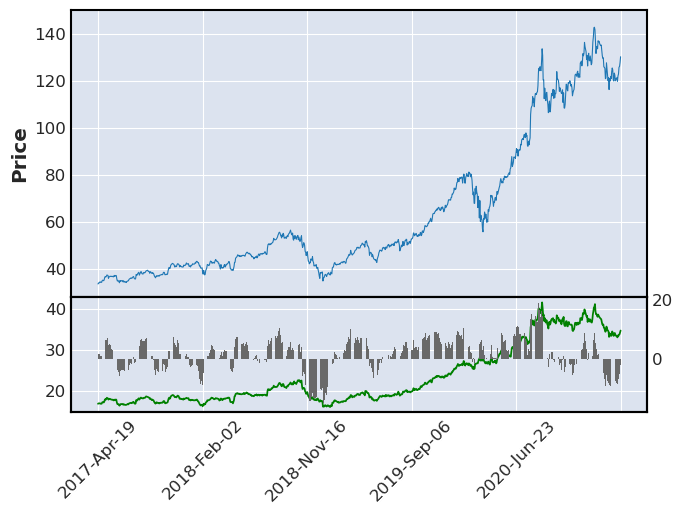

In [33]:
ap1 = [ mpf.make_addplot(df_result['rsd'].iloc[-1000:],color='g',panel=1),  # panel 2 specified
        mpf.make_addplot(df_result['rsm'].iloc[-1000:],type='bar',width=0.7,panel=1, color='dimgray',alpha=1,secondary_y=True)
      ]

mpf.plot(df_stock.iloc[-1000:],type='line',addplot=ap1)